<a href="https://colab.research.google.com/github/Amenhotep19/0x/blob/master/Copy_of_2_Building_a_Basic_Neural_Net_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __2: Building a Basic Neural Net in TensorFlow__

## Learning Objectives

In this notebook, we'll learn...
- the basic components of a deep neural network
- how to express and combine them into a model in TensorFlow
- how to visualize a declared model
- how to compile and fit a neural network

## __The Sequential Model__

The vast majority of deep learning applications employ a [sequential structure](https://keras.io/getting-started/sequential-model-guide/), meaning that layers are stacked in order from the input to output layers. In the example below, the input layer passes to hidden layer 1, layer 1 to hidden layer 2, and finally layer 2 to the output layer.

<img src="https://github.com/allemanau/NUIT_tensorflow/blob/master/images/sequential_model.png?raw=1">

We build sequential models progressively by adding layers to a model object. To start adding layers, though, we need an empty model to start. Using Keras, a sequential model can be declared as follows:
```
model = Sequential()
```
Let's load up TensorFlow and actually declare an empty model.

In [0]:
# Import latest TensorFlow 2 release
# Until 2.x is the default in Colab, stipulates that we want to load the latest version of TensorFlow 2.0, not 1.x.
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Reshape, Flatten
from tensorflow.keras.utils import plot_model, to_categorical

# For simulating data and plotting results.
import numpy as np
import matplotlib.pyplot as plt

Since we've expressly imported the `tensorflow.keras.models` module, we instantiate the model as below. We can visualize the structure of model using a utility from `tensorflow.keras.utils`:

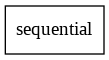

In [0]:
my_model = Sequential()

# We can use the plot_model function from tensorflow.keras.utils to visualize our empty model
plot_model(my_model, show_shapes = True)

### Adding layers to a model

Once a model is instantiated, you can add a layer of neurons to it using the `add()` method:
```
my_model = Sequential()
my_model.add(...)
```
But before we actually try this, we should discuss the types of layers available to add!

## __Core Layers__

TensorFlow offers a collection of so-called [core layers](https://keras.io/layers/core/). These constructs are the building blocks of most neural networks. Let's discuss the ones that will get us up and running.

### Input layer

Input layers __explicitly__ specify the input shape (excluding number of examples) of the input. For example, if our inputs were vectors of length 3, we could do the following:

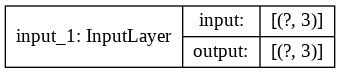

In [0]:
my_model = Sequential()
my_model.add(Input(shape = (3,)))

# We can use the plot_model function from tensorflow.keras.utils to visualize our empty model.
# show_shapes = True ensures the input and output dimensions for each layer are reported.
plot_model(my_model, show_shapes = True)

Now we have the very first layer of a model. The '?' in the `plot_model` output indicates that the number of examples varies. Each example is a 1D tensor of size 3. Thus, if we have `n` examples, our input data is a 2D tensor of size `(n, 3)`. 

### Dense layer

`Dense` layers are the hidden layers you might be familiar with in standard neural networks. They are fully connected to inputs in the preceding layer, and outputs in the following layer. This small example is composed only of `Dense` layers:

<img src="https://github.com/allemanau/NUIT_tensorflow/blob/master/images/larger_example_network.png?raw=1">



__Hidden layer 1__ is a `Dense` layer with 4 units. We could add it to a model with an existing `Input` layer like so:

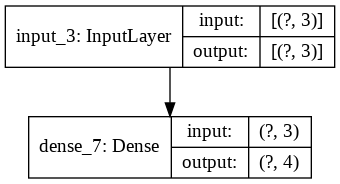

In [0]:
# From before, just to reiterate.
my_model = Sequential()
my_model.add(Input(shape = (3,)))

# Add hidden layer 1
my_model.add(Dense(units = 4))

plot_model(my_model, show_shapes = True)

If we haven't specified `Input` we can use the `input_shape` argument to implicitly define it:

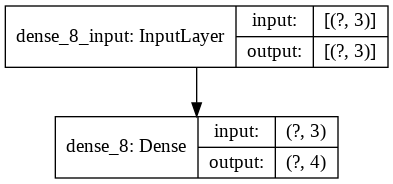

In [0]:
# Redeclare empty my_model. Notice no input layer is explicitly specified.
my_model = Sequential()
my_model.add(Dense(units = 4, input_shape = (3,)))

plot_model(my_model, show_shapes = True)

In a sequential model in TensorFlow, __hidden layer 2__ is aware of hidden layer 1's shape, so assuming we've already added hidden layer 1 we just declare hidden layer 2 as:

In [0]:
my_model.add(Dense(4))

In general classification problems, the output layer will be a `Dense` layer of the same size as the number of possible classes. (__Note:__ binary problems have an equivalent representation with one neuron in the output layer. For consistency, we'll ignore this case.) In this layer, the node with the highest activation value for a given input determines the class:

In [0]:
my_model.add(Dense(2))

Let's take a look at the model diagram.

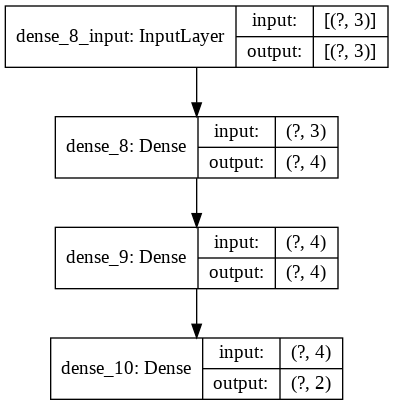

In [0]:
plot_model(my_model, show_shapes = True)

### Activation

The choice of activation function at each layer determines network performance and convergence of the weights in the training process. In the previous exercise, notice no mention was made of activation functions; in this case, a linear activation function is assumed. To change the activation function for a layer, we can sandwich in `Activation` layers, for example:

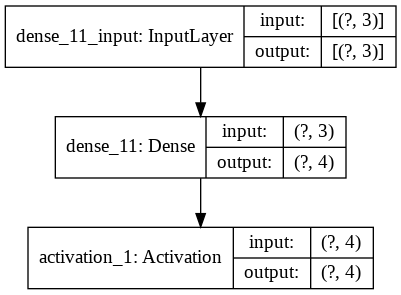

In [0]:
# Redeclare empty my_model.
my_model = Sequential()
my_model.add(Dense(units = 4, input_shape = (3,)))
my_model.add(Activation("relu"))

plot_model(my_model, show_shapes = True)

A more concise way to layer in activation is just to use the `activation` argument in the `Dense()` call, as below. But be careful -- notice the visualization does not display an `Activation` layer in this case, so be careful in assembling your model! 

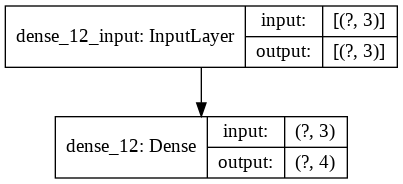

In [0]:
# Redeclare empty my_model.
my_model = Sequential()
my_model.add(Dense(units = 4, input_shape = (3,), activation = "relu"))

plot_model(my_model, show_shapes = True)

As with all the various components of deep learning, there's an art and a science to choosing activation functions. A full list of available activations can be found in the [documentation](https://keras.io/activations/).

### Combining Dense and Activation Layers

Let's build a quick model. Here's a network diagram for binary classification. Assume the hidden layer is activated by a sigmoid, and the output layer a softmax.

<img src="https://github.com/allemanau/NUIT_tensorflow/blob/master/images/exercise_1.png?raw=1">

In TensorFlow, this model could be built as follows:

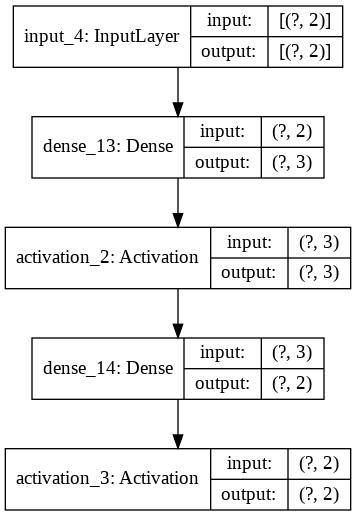

In [0]:
# Declare empty model.
my_model = Sequential()

# Add the input layer.
my_model.add(Input(shape = (2,)))

# Add a dense layer after the input layer.
my_model.add(Dense(units = 3))

# Activate the previous layer using sigmoids.
my_model.add(Activation(activation = "sigmoid"))

# Add an output layer. Our output layer has two classes, and hence is of size 2.
my_model.add(Dense(units = 2))

# Activate the output layer using softmax.
my_model.add(Activation(activation = "softmax"))

plot_model(my_model, show_shapes = True)

### __Exercise 1: building a sequential model (~10 min)__

Build a version of the network we've been referencing as an example: 

<img src="https://github.com/allemanau/NUIT_tensorflow/blob/master/images/larger_example_network.png?raw=1">

The hidden layers should be sigmoid ("sigmoid") activated, and the last layer should be softmax ("softmax") activated. First, do it with `Activation` layer calls. Then, do it with the `activation` argument in `Dense()` calls (`Dense(..., activation = "blah")`). In both cases, use `plot_model` to visualize.

### Ex 1a: using `Dense` and `Activation` layers

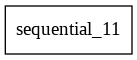

In [0]:
# Declare empty model.
ex1a = Sequential()

### Add layers here.


###

plot_model(ex1a, show_shapes = True)

### Ex 1b: using `activation = ` arguments in `Dense()` calls

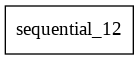

In [0]:
# Declare empty model.
ex1b = Sequential()

### Add layers here.


###

plot_model(ex1b, show_shapes = True)

### Dropout Layers

Dropout is one efficient way to avoid overfitting as part of the training process. Dropout randomly deactivates a fraction of the nodes in a layer during each iteration of the training process. If you'd like to know how dropout helps to prevent overfitting, see this [gentle but detailed introduction](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/).

![](https://miro.medium.com/proxy/1*iWQzxhVlvadk6VAJjsgXgg.png)

Like `Activation`, `Dropout` applies to the preceding layer. In actuality, dropout doesn't make a lot of sense for this particular network, but for larger, more complex architectures, we could use it to improve performance.

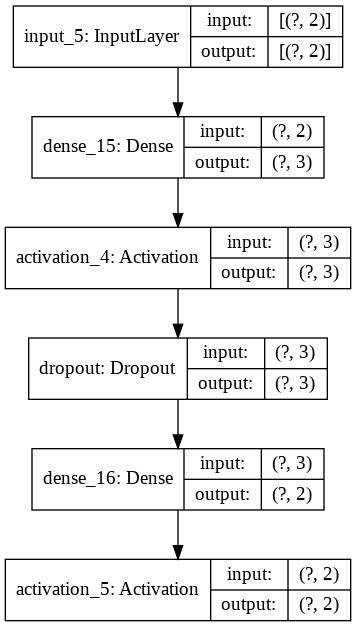

In [0]:
my_model = Sequential()
my_model.add(Input(shape = (2,)))
my_model.add(Dense(units = 3))
my_model.add(Activation(activation = "sigmoid"))

# Add a dropout layer
my_model.add(Dropout(rate = 0.33))

my_model.add(Dense(units = 2))
my_model.add(Activation(activation = "softmax"))

plot_model(my_model, show_shapes = True)

### Flatten and Reshape


`Reshape` converts a tensor of given dimension into one of another. In order for `Reshape` to work, the dimensions have to agree.

`Flatten` simply converts a layer with more than one dimension to a 1D tensor. Useful for transforming input or hidden layers of dimension greater than one. If there is a special ordering in which the data should be flattened, the `data_format` argument can be used (although we won't use it).

Here's an example using a `Flatten` layer to undo a `Reshape` layer:

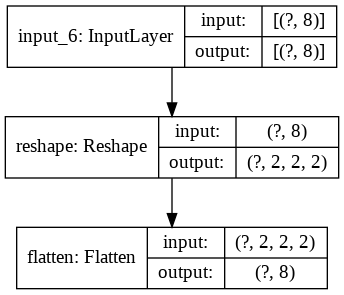

In [0]:
my_model = Sequential()
my_model.add(Input(shape = (8,)))

# Here, reshape converts 1D length-10 tensor into a 3D 2x2x2 tensor:
my_model.add(Reshape(target_shape = (2,2,2)))

# Flatten undoes the works Reshape just did:
my_model.add(Flatten())

plot_model(my_model, show_shapes = True)

## __Compiling a Model__

In order to train a model and use it to make predictions, the model needs to be "compiled", or configured for training. In this phase, we also specify some important components of the model such as [__loss function(s)__](https://keras.io/losses/) to minimize, [__metric(s)__](https://keras.io/metrics/) to report, and an [__optimizer__](https://keras.io/optimizers/) to use, among other options. This is a simple step if you know how to specify these options:

In [0]:
my_model = Sequential()
my_model.add(Input(shape = (3,)))
my_model.add(Dense(units = 4))
my_model.add(Activation(activation = "sigmoid"))
my_model.add(Dense(units = 4))
my_model.add(Activation(activation = "sigmoid"))
my_model.add(Dense(units = 2))
my_model.add(Activation(activation = "softmax"))

# Train the network for binary classification using the following options:
# Optimization routine = Stochastic Gradient Descent ('sgd')
# Loss = binary cross-entropy (for multi-class problems, use 'categorical_crossentropy')
# Metric = classification accuracy. Can be a list of multiple metrics if desired.
my_model.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

# No errors means our model compiled fine.

Aside from the fact that you have to make sure the options make sense for your problem, the only trick here is that any time you change your model architecture or options, __it needs to be rebuilt and recompiled before training.__

## __Training and Evaluating a Compiled Network__

Only one step left before we have a fully operational Death Star -- err, model -- the __training phase__. Like model compilation, this is a straightforward step if you know some specifics:

- `epochs`: how long should the model be trained for? 
- `batch_size`: how many examples should the model analyze and update on at a time?

Let's start by simulating a binary classification problem for a network we've already built:

In [0]:
# Set random initial seed, so we all have the same data.
np.random.seed(2020)

# Generate 1000 3-D points distributed in [0,1]x[0,1]x[0,1]
x_train = np.random.random((1000, 3))

# Generate nonlinear labels correlated with the random values in data.
def label_gen(x):
  return (x[0]*x[1] + np.random.normal(scale = .1)) > .5

# Run the label_gen function for each row of x_train.
labels = np.apply_along_axis(label_gen, 1, x_train)

# Convert labels to categorical one-hot encoding
y_train = to_categorical(labels, num_classes=2)

print("Training data:")
print(x_train)
print("\nOne-hot encoded training labels:")
print(y_train)

Training data:
[[0.98627683 0.87339195 0.50974552]
 [0.27183571 0.33691873 0.21695427]
 [0.27647714 0.34331559 0.86215894]
 ...
 [0.29907663 0.28539503 0.32548271]
 [0.73633066 0.38508647 0.22415546]
 [0.90946914 0.84397851 0.3874555 ]]

One-hot encoded training labels:
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


Now, training the model is as simple as feeding the training and test data to the `fit()` method. We'll let it go for 500 epochs and see what happens.

__Note 1:__ `my_model` itself is permanently modified by the training process.

__Note 2:__ although it may sound strange given how the code looks, `history` is not the trained model! It is a history of the training process, and offers many useful analysis and visualization tools. We'll see one in a second.

In [0]:
history = my_model.fit(x = x_train, 
                       y = y_train,
                       epochs = 500)

Epoch 1/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4910
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.8160
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5855 - accuracy: 0.8160
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.8160
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5268 - accuracy: 0.8160
Epoch 6/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.8160
Epoch 7/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4983 - accuracy: 0.8160
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4919 - accuracy: 0.8160
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.8160
Epoch 10/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.8160
Epoch 11/

The `history` object enables us to plot improvement in training accuracy and loss over our training epochs. If everything's working correctly, we expect to see accuracy increase and loss decrease over time. If not, it's time to do a little detective work.

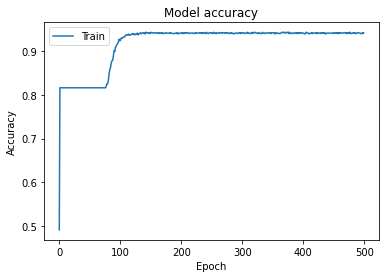

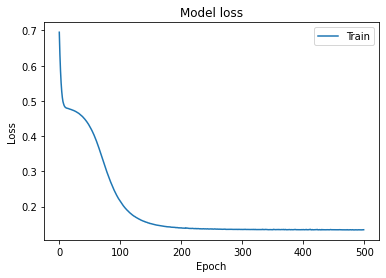

In [0]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

Of course, the purpose of our model is make accurate predictions on data it hasn't yet seen. Let's generate some random test data the same way we did training data.

In [0]:
np.random.seed(2021)

# Generate 1000 3-D points distributed in [0,1]x[0,1]x[0,1]
x_test = np.random.random((1000, 3))

# Generate nonlinear labels correlated with the random values in data.
def label_gen(x):
  return (x[0]*x[1] + np.random.normal(scale = .1)) > .5

# Run the label_gen function for each row of x_test.
labels = np.apply_along_axis(label_gen, 1, x_test)

# Convert labels to categorical one-hot encoding
y_test = to_categorical(labels, num_classes=2)

Now, using the `evaluate()` method, we can determine how well our model does out-of-sample. No seed's been set for the random test data, so everyone will have different results.

In [0]:
score = my_model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:")
print("{}%".format(np.round(100*score[1], 2)))

Test accuracy:
92.5%


Since the test and training data have been generated by the same process, we expect similar accuracy and loss on the test data, although we've done nothing to ensure our model hasn't overfitted the training data (more on this in a bit). Glancing at the training accuracy plot may give you a sense of when it makes sense to stop training the model for efficiency's sake.

### __Exercise 2: modifying network parameters (~5 min)__

Without too much time and effort, you can modify the parameters and network architecture to get $\ge93\%$ test accuracy virtually every time you train it.

__Try a different activation function in the hidden layers__. For instance, does it make a difference if you use ReLU instead of sigmoid? What if you mix activation functions?

__Play around with the hidden layers.__ Do we need both layers? Remove one and see what happens. Does adding more units matter?

__Choose a suitable number of epochs to train the model for, based on the prior accuracy and loss plots__. Compare your test accuracy with the accuracy you obtained when training for 500 epochs. (Keep in mind that the training process itself is subject to randomness, so your results may vary fit to fit even if the number of epochs remains the same.)

In [0]:
num_epochs = 200

my_model = Sequential()
my_model.add(Input(shape = (3,)))
my_model.add(Dense(units = 4))
my_model.add(Activation(activation = "sigmoid"))
my_model.add(Dense(units = 4))
my_model.add(Activation(activation = "sigmoid"))
my_model.add(Dense(units = 2))
my_model.add(Activation(activation = "softmax"))

my_model.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

history = my_model.fit(x = x_train, 
                       y = y_train,
                       epochs = num_epochs,
                       verbose = 0)

score = my_model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:")
print("{}%".format(np.round(100*score[1], 2)))

Test accuracy:
92.6%


## __Review__

Concepts to know:

- __The sequential model__
  - What does it mean for layers to be sequentially organized?
- __Layers__. For each of `Input`, `Dense`, `Activation`, and `Dropout`:
  - How are they structured? 
  - What does each one do?
  - What are their input and output sizes? 
- What do `Flatten` and `Reshape` do?
- __Compilation__
  - What is the purpose of compilation? 
  - What important options can you adjust at compilation time? 
  - Do you ever need to recompile your model?
- __Training__
  - What does training do to a neural network?
  - What is a `history` object useful for?
  - What is an epoch?
- __Evaluation__
  - What is the purpose of evaluation?

## __Next__: building a neural network on real data